In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load dataset
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data (scale pixel values to range [0, 1])
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape to add channel dimension
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [3]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [4]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 103ms/step - loss: 0.4548 - val_loss: 0.2967
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - loss: 0.2921 - val_loss: 0.2859
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - loss: 0.2816 - val_loss: 0.2815
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - loss: 0.2786 - val_loss: 0.2785
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - loss: 0.2757 - val_loss: 0.2765
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - loss: 0.2738 - val_loss: 0.2749
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - loss: 0.2724 - val_loss: 0.2735
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - loss: 0.2710 - val_loss: 0.2728
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - loss: 0.2702 - val_loss: 0.2718
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - loss: 0.2693 - val_loss: 0.2714


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


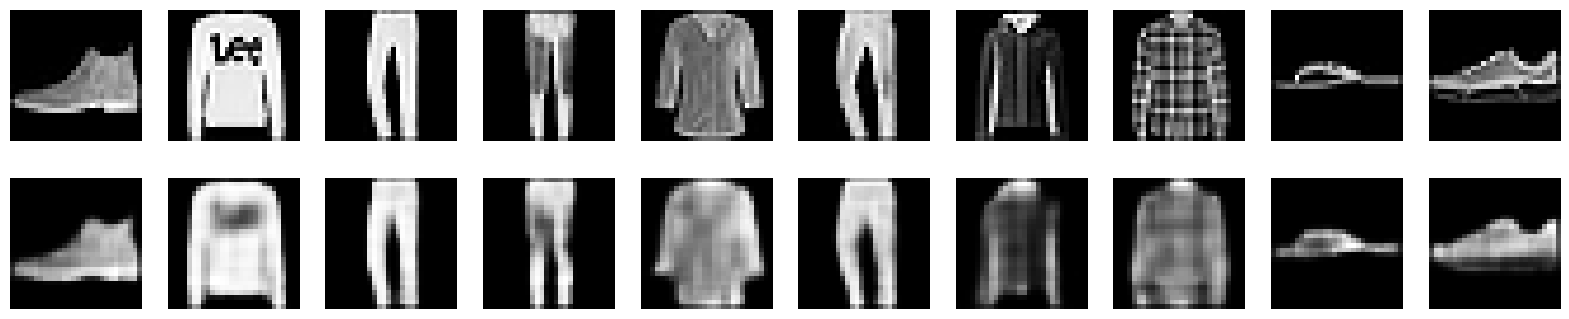

In [5]:
# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()


In [6]:
mse = np.mean(np.square(x_test - decoded_imgs))
print(f"Reconstruction MSE: {mse:.6f}")

Reconstruction MSE: 0.009163
